In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy import ones
from numpy import zeros
import random
from numpy.random import randn
from matplotlib import pyplot


given_mean = 0.6        #storing the given mean
given_std = 0.2         #storing the given standard deviation  
no_of_samples = 1000

#np.random.seed(2)
def real_samples():
    real_data = np.random.normal(loc = given_mean, scale = given_std, size =  no_of_samples)
    distribution = norm.pdf(real_data, loc = given_mean, scale = given_std)
    X1 = real_data.reshape(no_of_samples, 1)
    X2 = distribution.reshape(no_of_samples, 1)
    X = np.hstack((X1,X2))         #horizontally stacking data and distribution
    Y = ones((no_of_samples,1))
    return X,Y
def fake_samples():
    fake_mean = random.uniform(0,2)
    fake_std = random.uniform(0,2)
    fake_data = np.random.normal(loc = fake_mean, scale = fake_std, size =  no_of_samples)
    distribution = norm.pdf(fake_data, loc = given_mean, scale = given_std)
    X1 = fake_data.reshape(no_of_samples, 1)
    X2 = distribution.reshape(no_of_samples, 1)
    X = np.hstack((X1,X2))         #horizontally stacking data and distribution
    y = np.zeros((no_of_samples,1))    
    return X,y


In [13]:
def define_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(32,input_dim = 2,activation = 'relu'))
    discriminator.add(Dense(1,activation = 'sigmoid'))
    discriminator.summary()
    opt = Adam(learning_rate=0.01)
    discriminator.compile(loss='binary_crossentropy', optimizer = opt , metrics=['accuracy'])     #Compiling Discrimator
    discriminator.trainable = False                                                               #So that the laayers are frozen during GAN network training
    return discriminator

In [38]:
def train_discriminator(model,n_epochs):
    for i in range(n_epochs):
        X_real,y_real = real_samples()
        model.train_on_batch(X_real,y_real)
        X_fake,y_fake = fake_samples()

model = define_discriminator()
train_discriminator(model,1000)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [39]:
#No need to compile generator because of not beit fit directly
def define_generator(latent_dim):
    generator = Sequential()
    generator.add(Dense(34,input_dim =latent_dim, activation = 'relu'))
    generator.add(Dense(2, activation='linear'))              
    generator.summary()                              
    return generator

In [40]:
#Defining and Compiling GAN Network
def define_gan(generator,discriminator):
    gan_network = Sequential()
    gan_network.add(generator)
    gan_network.add(discriminator)
    gan_network.compile(loss ='binary_crossentropy', optimizer ='adam')
    return gan_network

In [41]:
def latent_points_generation(latent_dim, no_of_samples):
    x_input = randn(latent_dim*no_of_samples)          #producing points of nornally distributed 
    x_input = x_input.reshape(no_of_samples,latent_dim)
    return x_input

In [60]:
def train_all(dis,generator,gan, latent_dim, epochs =5000, batch = 128):
    for i in range(epochs):
        print_bool = 0
        if((i+1)%1000==0):
            print_bool = 1
        X_gan = latent_points_generation(latent_dim, batch)
        y_gan = ones((batch,1))
        gan.train_on_batch(X_gan,y_gan)
        if (print_bool==1):
            summarize_performance(generator,dis)        

In [61]:
def summarize_performance(generator, discriminator,n=1000):
    X_real, y_real = real_samples()
    X_fake, y_fake = fake_samples()
    plt.subplot(121)
    plt.title(label = 'Gaussian with original data')
    plt.xlabel("Data")
    plt.ylabel("Pdf of data")
    plt.scatter(X_real[:, 0], X_real[:, 1], color='red', label = 'Original')
    plt.subplot(122)
    plt.title(label = 'Gaussian with generated data')
    plt.xlabel("Data")
    plt.ylabel("Pdf of data")
    plt.scatter(X_fake[:, 0], X_fake[:, 1], color='blue', label ='Generated')
    plt.show()

Discriminator Summary

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________

Generator Summary

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 34)                102       
_________________________________________________________________
dense_80 (Dense)             (None, 2)                 70        
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________

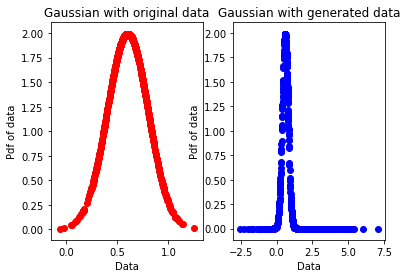

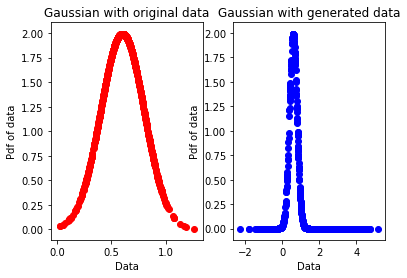

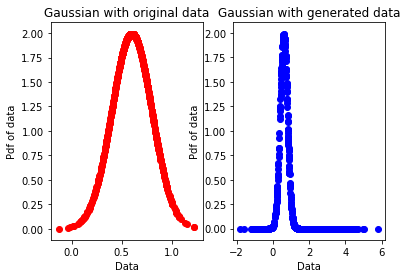

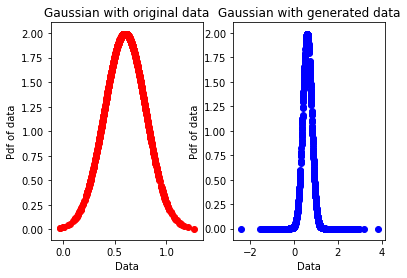

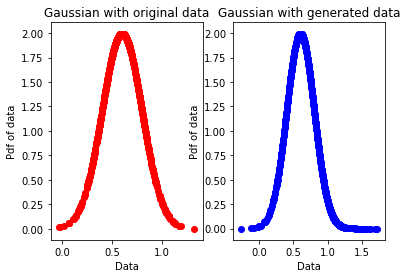

In [62]:
latent_dim = 2
print ("Discriminator Summary\n")
discriminator = define_discriminator()
print("\nGenerator Summary\n")
generator = define_generator(latent_dim)
gan_model = define_gan(generator, discriminator)
train_all(discriminator,generator,gan_model, latent_dim)